###  What is the relationship between health indicators such as heart rate, breathing rate, sweating, dizziness, and anxiety?


In [13]:
#Dependencies needed for this section of the project:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Read into the resource csv file and store it into a DataFrame
anxiety_df = pd.read_csv("Resources/anxiety_attack_dataset.csv")
# Display a sample of the DataFrame
anxiety_df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [3]:
# Calculate the total number of individuals in the dataset
individual_count = int(anxiety_df['ID'].count())
individual_count

12000

In [4]:
# Calculate the number of individuals per occupation
occupation_counts = anxiety_df['Occupation'].value_counts()
occupation_counts

Occupation
Unemployed    2139
Doctor        2004
Teacher       1980
Other         1971
Student       1953
Engineer      1953
Name: count, dtype: int64

In [5]:
# Convert the above series into a DataFrame for future visualization
occupation_counts_df = occupation_counts.reset_index()
occupation_counts_df.columns = ['Occupation', 'Count']
occupation_counts_df

,Occupation,Count
0,Unemployed,2139
1,Doctor,2004
2,Teacher,1980
3,Other,1971
4,Student,1953
5,Engineer,1953


In [6]:
# Calculate the minimum and maximum age in the dataset to get an idea of which age ranges are represented
minimum_age = anxiety_df['Age'].min()
maximum_age = anxiety_df['Age'].max()
minimum_age, maximum_age

(18, 64)

### Heart rate vs anxiety 
One way to look into the relationshp between heart rate and anxiety level can be using a scatter plot. The scatterplot will allow to see any potential correlation between the two variables. 

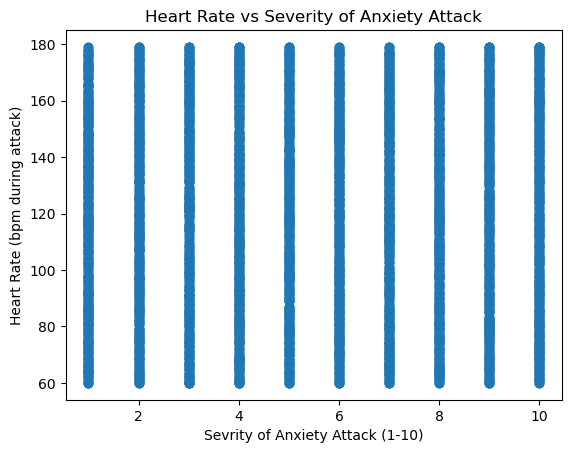

In [7]:
# Identify the data for the plot
x = anxiety_df['Severity of Anxiety Attack (1-10)']
y = anxiety_df['Heart Rate (bpm during attack)']

# Creating the scatter plot
plt.scatter(x, y, alpha=0.5)
plt.title("Heart Rate vs Severity of Anxiety Attack")
plt.xlabel("Sevrity of Anxiety Attack (1-10)")
plt.ylabel("Heart Rate (bpm during attack)")
plt.show()

The above scatter plot indicaes that there may be a potential relationship between severity of anxiety and heart rate, but is hard to interpret due to overlapping points. 

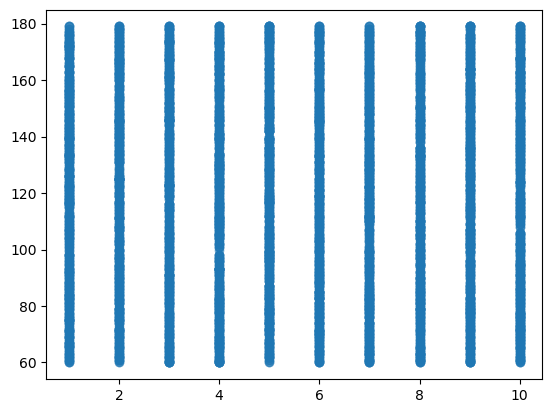

In [8]:
# See if a random subset of the data can reveal patterns without excessive clutter

anxiety_subset = anxiety_df.sample(frac=0.5, random_state=42)
plt.scatter(anxiety_subset['Severity of Anxiety Attack (1-10)'],
            anxiety_subset['Heart Rate (bpm during attack)'], alpha=0.5) 
plt.show()

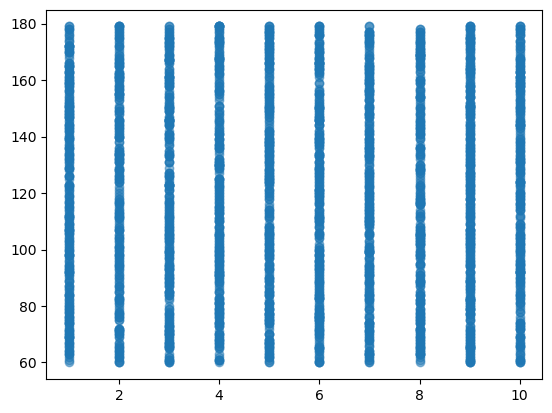

In [9]:
# Would separating it by age range make a difference?
young_adults = anxiety_df[anxiety_df['Age'] < 30]
plt.scatter(young_adults['Severity of Anxiety Attack (1-10)'],
            young_adults['Heart Rate (bpm during attack)'], alpha=0.5)
plt.show()

Instead of plotting every data point in  a scatter plot like above, which resulted in a clustter of overlapping point, an aggregation approach was employed to summerize the heart rate distribution at each severity level. We imported seaborn and chose a boxplot as follows. 

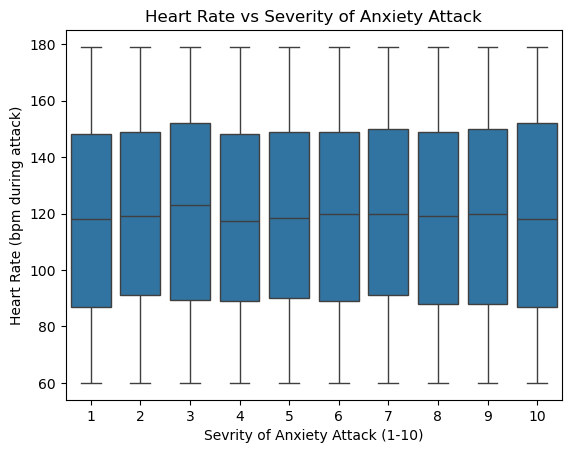

In [29]:
sns.boxplot(x='Severity of Anxiety Attack (1-10)', y='Heart Rate (bpm during attack)', data=anxiety_df)
plt.title("Heart Rate vs Severity of Anxiety Attack")
plt.xlabel("Sevrity of Anxiety Attack (1-10)")
plt.ylabel("Heart Rate (bpm during attack)")
plt.savefig("Outputs/heart_rate_vs_anxiety.png")
plt.show()

### Is there a correlation between the severity of anxiety and heart rate?
Not according to the above visualization of the dataset. 
* The median heart rate represented by the middle line in each box remains relatively consistent accross all severity levels. No significant increasing or decreasing trend in heart rate can be seen as severity increased. 
* The interquartile range, represented by the width of the boxes, is not varied significantly across severity levels. The whiskers also show that heart rate ranges between 60bpm and 180bpm for all severity levels. 
* The data is evenly distributed without any anomalies as there are no ectreme outliers in the plot. 
In conclusion, this boxplot suggests that heart rate is fairly consistent regardless of severity of anxiety attacks. Hert rate is not strongly influenced by the reported attack levels in this dataset.  

In [14]:
# Confirming the above analysis with statistical tests
# Since the data is on a 1-10 severity scale, we belive that Spearman's correlation is a better choice
spearman_corr, spearman_p = stats.spearmanr(anxiety_df['Severity of Anxiety Attack (1-10)'],
                                            anxiety_df['Heart Rate (bpm during attack)'])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Spearman Correlation: -0.000, p-value: 0.970


In [16]:
# Our research shows that since severity is a categorical value and heart rate is numerical, 
# a one way ANOVA could help us see if the mean heart rate significantly differs between 
# different severity levels
anova_result = stats.f_oneway(*[anxiety_df[anxiety_df['Severity of Anxiety Attack (1-10)'] == level]['Heart Rate (bpm during attack)'] 
                                for level in anxiety_df['Severity of Anxiety Attack (1-10)'].unique()])

print(f"ANOVA F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.3f}")

ANOVA F-statistic: 0.378, p-value: 0.946


The above two statistical tests concur with the previous analysis. 
* The Spearman correlation of -0.00 indicates that there is no consistent pattern in heart rate changes with different levels of anxiety attack severity. 
* The p-value of 0.970, using the Spearman method, suggests that the corelation between level of anxiety and heart rate is no statistically significant. If one was to hypothesize that there is no effect between these two variables, the p_value would suggest that the result is consistent with the null hypothesis. 
* Similarly, the p-vale in ANOVA test is > 0.05 suggesting that heart rate dose not significantly vary accross severity levels. 

### Breathing Rate vs anxiety 

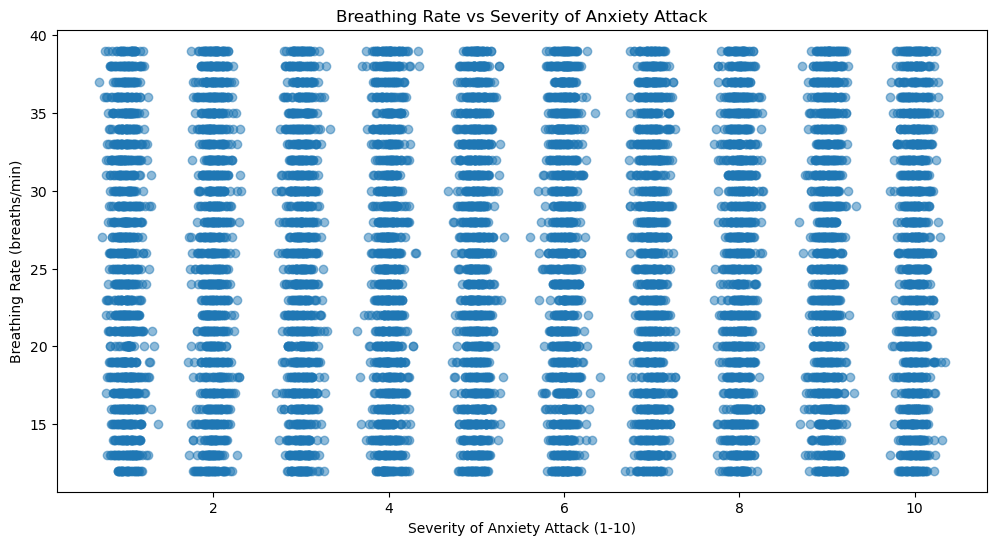

In [30]:
# Since there are too many overlapping data points in the dataset, we used a stip plot 
# to attempt and avoid the overlaps. 
# The strip plot adds a smal random niose to the x-values and introduce a jitter effect. 

# Data for the plot:
x = anxiety_df['Severity of Anxiety Attack (1-10)']
y = anxiety_df['Breathing Rate (breaths/min)']

# Random noise to x: 
x_jittered = x + np.random.normal(0, 0.1, size=x.shape)

# Create the strip plot
plt.figure(figsize=(12, 6))
plt.scatter(x_jittered, y, alpha=0.5)

# Title and labels:
plt.title('Breathing Rate vs Severity of Anxiety Attack')
plt.xlabel('Severity of Anxiety Attack (1-10)')
plt.ylabel('Breathing Rate (breaths/min)')
plt.savefig("Outputs/breathing_rate_vs_anxiety.png")
plt.show()

This stip plot shows that for each severity level, the breathing rate ranges between 10 and 40 breaths per minute. There is no clear pattern observed. 

In fact, some individuals with low severity (below three) have high breathing rates, while high severity (above 8) have low breathing rates. 

### Sweating  vs anxiety 

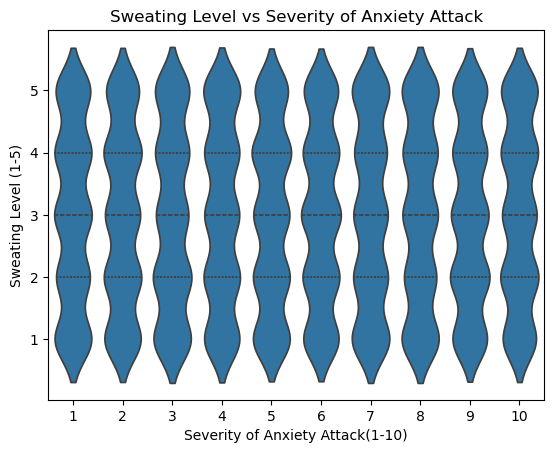

In [31]:
# To show the distribution of the data across the different categories, we chose a 
# violin plot. A violin plot is essentially a combination of box plot and density plot. 

# Create the plot:
sns.violinplot(x='Severity of Anxiety Attack (1-10)', y='Sweating Level (1-5)', data=anxiety_df, inner='quartile')

# Titles and labels 
plt.title('Sweating Level vs Severity of Anxiety Attack')
plt.xlabel('Severity of Anxiety Attack(1-10)')
plt.ylabel('Sweating Level (1-5)')
plt.savefig("Outputs/sweating_vs_anxiety.png")
plt.show()

The violin plot suggests a wide variation in sweating levels across all anxiety levels.
This could indicate that sweating levels are not strongly correlated with anxiety levels.

## Overall Conclusion
Health indicators such as heart rate, breathing rate, and sweating level do not show a significant correlation with the severity of anxiety attacks in this dataset. This indicators are relatively consistent across different levels of anxiety. 

However, some studies suggest that anxiety can lead to increased sweating due to to the body's stress response. However, the relationship isn't always straightforward and other factors can influence these health indicators. 